In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nft_sales_v3004.csv')
df

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$4,065,032,779","1,724,932","15,829,552","2,560,082"
1,CryptoPunks,"$2,219,339,345","5,489","20,892","3,634"
2,Bored Ape Yacht Club,"$1,918,212,623","10,878","28,329",NaN
3,Mutant Ape Yacht Club,"$1,357,836,830","19,663","36,153",NaN
4,Art Blocks,"$1,234,293,195","28,912","153,656","33,996"
5,NBA Top Shot,"$990,811,487","427,724","19,456,210","679,149"
6,CloneX,"$619,974,876","8,533","16,355",NaN
7,Azuki,"$615,624,302","12,036","25,623",NaN
8,VeeFriends,"$535,038,866","6,123","13,471",NaN
9,Moonbirds,"$481,046,853","11,716","15,868",NaN


In [3]:
df.describe()


,Collections,Sales,Buyers,Txns,Owners
count,250,250,250,250,122
unique,250,250,248,250,116
top,MetaHero Universe DAO Tokens,"$21,582,973","4,541","7,275",1
freq,1,1,2,1,7


In [4]:
df.info

<bound method DataFrame.info of                             Collections           Sales     Buyers  \
0                         Axie Infinity  $4,065,032,779  1,724,932   
1                           CryptoPunks  $2,219,339,345      5,489   
2                  Bored Ape Yacht Club  $1,918,212,623     10,878   
3                 Mutant Ape Yacht Club  $1,357,836,830     19,663   
4                            Art Blocks  $1,234,293,195     28,912   
5                          NBA Top Shot    $990,811,487    427,724   
6                                CloneX    $619,974,876      8,533   
7                                 Azuki    $615,624,302     12,036   
8                            VeeFriends    $535,038,866      6,123   
9                             Moonbirds    $481,046,853     11,716   
10                              Meebits    $480,996,069     10,997   
11                              Doodles    $412,908,187     11,536   
12                          The Sandbox    $370,969,230   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
Collections    250 non-null object
Sales          250 non-null object
Buyers         250 non-null object
Txns           250 non-null object
Owners         122 non-null object
dtypes: object(5)
memory usage: 9.8+ KB


CLEAN DATASET

In [6]:
df.rename(columns = {'Sales':'Sales in USD','Txns':'Transactions'}, inplace = True)
df['Sales in USD'] = df['Sales in USD'].str.replace(',', '')
df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')
df['Buyers'] = df['Buyers'].str.replace(',','')
df['Transactions']=df['Transactions'].str.replace(',','')
df['Owners']=df['Owners'].str.replace(',','')
df=df.dropna()
df

,Collections,Sales in USD,Buyers,Transactions,Owners
0,Axie Infinity,4065032779,1724932,15829552,2560082
1,CryptoPunks,2219339345,5489,20892,3634
4,Art Blocks,1234293195,28912,153656,33996
5,NBA Top Shot,990811487,427724,19456210,679149
12,The Sandbox,370969230,24617,54742,19035
15,Sorare,294429218,88948,2051209,119559
18,CrypToadz,232171691,9136,20368,4223
22,Farmers World,196261760,69684,4734683,205035
24,Solana Monkey Business,183066416,4129,10013,6348
25,MekaVerse,175025000,6567,13456,4763


In [7]:
# CONVERTING STRING NUMERICALS TO INT
df['Sales in USD'] = df['Sales in USD'].astype('int64')
df['Buyers'] = df['Buyers'].astype('int64')
df['Transactions']=df['Transactions'].astype('int64')
df['Owners']=df['Owners'].astype('int32')

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [8]:
# CONVERTING STRING NUMERICALS TO INT
df['Sales in USD'] = df['Sales in USD'].astype('int64')
df['Buyers'] = df['Buyers'].astype('int64')
df['Transactions'] = df['Transactions'].astype('int64')
df['Owners'] = df['Owners'].astype('int32')
df.info()

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 249
Data columns (total 5 columns):
Collections     122 non-null object
Sales in USD    122 non-null int64
Buyers          122 non-null int64
Transactions    122 non-null int64
Owners          122 non-null int32
dtypes: int32(1), int64(3), object(1)
memory usage: 5.2+ KB


In [11]:
# MODIFYING THE DATA SET
# doanh so lon hon $100M as yes els as no
df['100 mil club'] = np.where(df['Sales in USD']>=100000000, 'Yes', 'No')
df['1 bilion club']=np.where(df['Sales in USD']>=1000000000, 'Yes','No')
df['20 miliclub']=np.where(df['Sales in USD']<=20000000,'Yes','No')

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to

In [12]:
df

,Collections,Sales in USD,Buyers,Transactions,Owners,100 mil club,1 bilion club,1 miliclub,20 miliclub
0,Axie Infinity,4065032779,1724932,15829552,2560082,Yes,Yes,No,No
1,CryptoPunks,2219339345,5489,20892,3634,Yes,Yes,No,No
4,Art Blocks,1234293195,28912,153656,33996,Yes,Yes,No,No
5,NBA Top Shot,990811487,427724,19456210,679149,Yes,No,No,No
12,The Sandbox,370969230,24617,54742,19035,Yes,No,No,No
15,Sorare,294429218,88948,2051209,119559,Yes,No,No,No
18,CrypToadz,232171691,9136,20368,4223,Yes,No,No,No
22,Farmers World,196261760,69684,4734683,205035,Yes,No,No,No
24,Solana Monkey Business,183066416,4129,10013,6348,Yes,No,No,No
25,MekaVerse,175025000,6567,13456,4763,Yes,No,No,No


# Sales of the NFTs which are under the 'Ape' Collection


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 249
Data columns (total 9 columns):
Collections      122 non-null object
Sales in USD     122 non-null int64
Buyers           122 non-null int64
Transactions     122 non-null int64
Owners           122 non-null int32
100 mil club     122 non-null object
1 bilion club    122 non-null object
1 miliclub       122 non-null object
20 miliclub      122 non-null object
dtypes: int32(1), int64(3), object(5)
memory usage: 9.1+ KB


In [44]:
Ape_collection = df[df['Collections'].str.contains("Ape")]
Ape_collection
sumsale=Ape_collection['Sales in USD'].sum()
sumsale
print(f"Total Sales of ' Ape club' Collection is {sumsale:,}$")
Ape_collection

Total Sales of ' Ape club' Collection is 272,481,459$


,Collections,Sales in USD,Buyers,Transactions,Owners,100 mil club,1 bilion club,1 miliclub,20 miliclub
34,Degenerate Ape Academy,136519451,7455,20190,5124,Yes,No,No,No
83,GalacticApes,60652344,8028,20859,3675,No,No,No,No
115,Desperate ApeWives,45511839,5650,13732,4441,No,No,No,No
165,Party Ape Billionaire Club,29797825,6360,13642,4498,No,No,No,No


In [ ]:
# BELOW GRAPH REPRESENTS TOTAL NUMBER OF OWNERS WHO OWN 'BORED APE' COLLECTION


AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

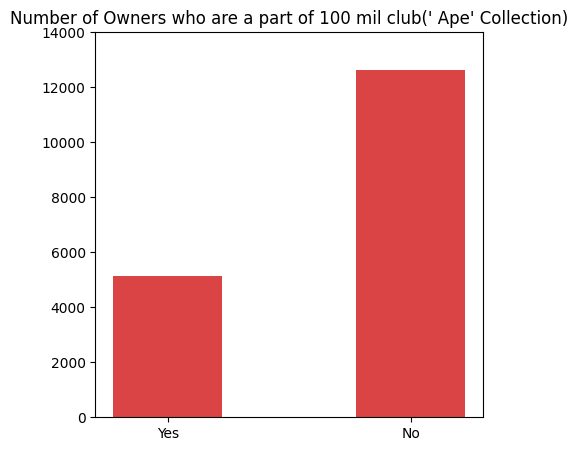

In [46]:
df2 = Ape_collection.groupby('100 mil club').sum()
owners = [df2['Owners'][1],df2['Owners'][0]]
con = ['Yes','No']
plt.style.use('default')
plt.figure(figsize=(5,5))
p =plt.bar(con,owners,width=0.45,color='#db4444')
plt.ylim(0,14000)
plt.title("Number of Owners who are a part of 100 mil club(' Ape' Collection)")
plt.bar_label(p)
plt.xlabel('100 mil club')
plt.ylabel('No. of owners')
plt.show()

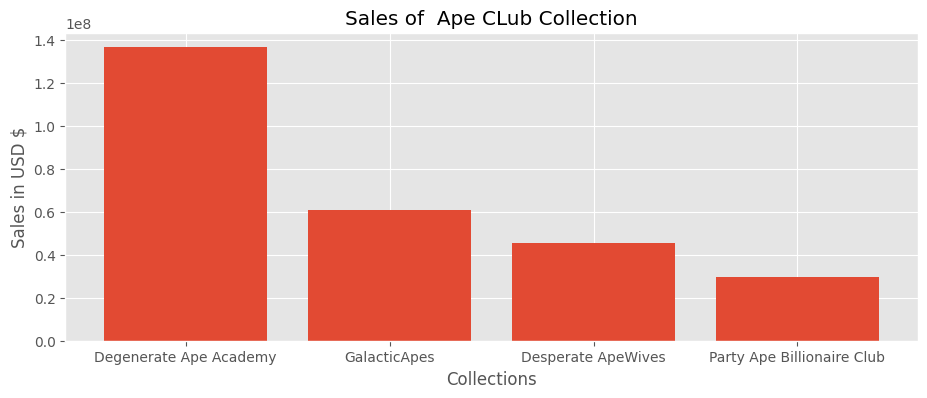

In [49]:
# SALES AS COMPARED TO EACH OTHER
collection = Ape_collection['Collections']
sales = Ape_collection['Sales in USD']
plt.style.use('ggplot')
plt.figure(figsize=(11,4))
plt.bar(collection,sales)
plt.title('Sales of  Ape CLub Collection')
plt.xlabel('Collections')
plt.ylabel('Sales in USD $')
plt.show()


In [ ]:
#vLETS FINDOUT AVERAGE SALES OF 100 MILLION CLUB


In [53]:
df_100 = df.loc[df['100 mil club'] == 'Yes']
average_sales_100 =round(df_100['Sales in USD'].mean())
df_no100 = df.loc[df['100 mil club'] == 'No']
average_sales_no100 = round(df_no100['Sales in USD'].mean())
print(f'Average sales of 100 million club is {average_sales_100:,}$')
print(f'average sales of no 100 milonclus {average_sales_no100: ,} $')

Average sales of 100 million club is 491,366,521.0$
average sales of no 100 milonclus  38,463,322.0 $


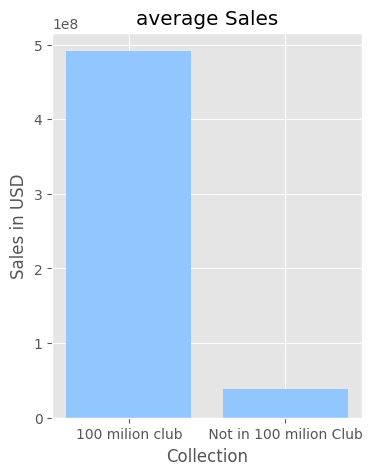

In [60]:
x=['100 milion club', ' Not in 100 milion Club ']
avg=[average_sales_100,average_sales_no100]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(4,5))
plt.bar(x,avg)
plt.title('average Sales')
plt.xlabel('Collection')
plt.ylabel('Sales in USD')
plt.show()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 249
Data columns (total 9 columns):
Collections      122 non-null object
Sales in USD     122 non-null int64
Buyers           122 non-null int64
Transactions     122 non-null int64
Owners           122 non-null int32
100 mil club     122 non-null object
1 bilion club    122 non-null object
1 miliclub       122 non-null object
20 miliclub      122 non-null object
dtypes: int32(1), int64(3), object(5)
memory usage: 9.1+ KB


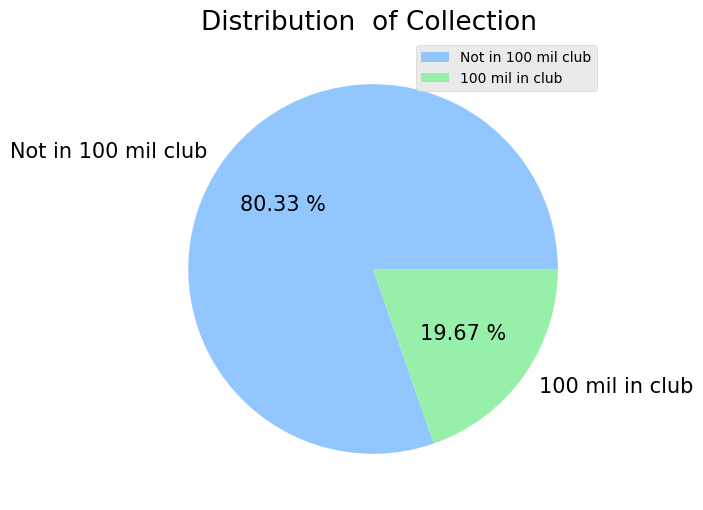

In [74]:
#Visualization of how much percentage of total collections belongs to 100 mil club
count=df.groupby(['100 mil club']).count()['Collections']
count
lables=["Not in 100 mil club","100 mil in club"]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(count ,labels=lables,autopct='%.2f %%',textprops={'fontsize':15})
plt.title("Distribution  of Collection ", fontdict={'fontsize':19})
plt.legend(fontsize=10)
plt.show()



In [52]:
#vLETS FINDOUT AVERAGE SALES OF UNDER 20 MILLION CLUB
df_20=df.loc[df['20 miliclub']=='Yes']
average_sales_20=round(df_20['Sales in USD'].mean())
df_n020=df.loc[df['20 miliclub']=='No']
average_sales_no20=round(df_n020['Sales in USD'].mean())
print(f'Average sales of under 20 milion club {average_sales_20:,}$')
print(f'average sales of no 20 milion club is {average_sales_no20: ,} $')

Average sales of under 20 milion club 18,001,918.0$
average sales of no 20 milion club is  140,625,478.0 $


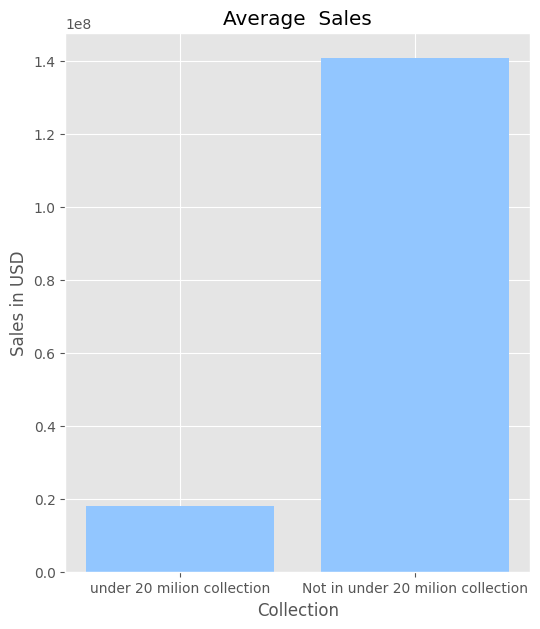

In [61]:
x=['under 20 milion collection','Not in under 20 milion collection']
avg1=[average_sales_20,average_sales_no20]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,7))
plt.bar(x,avg1)
plt.title('Average  Sales')
plt.xlabel('Collection')
plt.ylabel('Sales in USD')
plt.show()

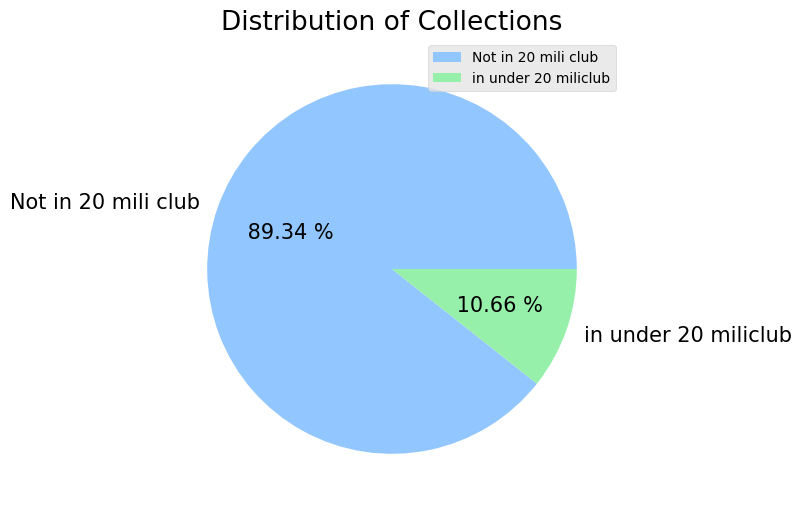

In [78]:
count_20=df.groupby(['20 miliclub']).count()['Collections']
count_20
lables_20=["Not in 20 mili club","in under 20 miliclub"]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(count_20,labels=lables_20,autopct='% 0.2f %%',textprops={'fontsize':15})
plt.title("Distribution of Collections",fontdict={'fontsize':19})
plt.legend(fontsize=10)
plt.show()


In [63]:
# let in finout average sales of 1 bilion club
df_1b=df.loc[df['1 bilion club']=='Yes']
average_sales_1b=round(df_1b['Sales in USD'].mean())
df_no_1b=df.loc[df['1 bilion club']=='No']
average_sales_no1b=round(df_no_1b['Sales in USD'].mean())
print(f'average sales of 1 bilion club is {average_sales_1b : ,} $')
print(f'average sales of not in 1 bil {average_sales_no1b: ,} $')

average sales of 1 bilion club is  2,506,221,773.0 $
average sales of not in 1 bil  67,592,746.0 $


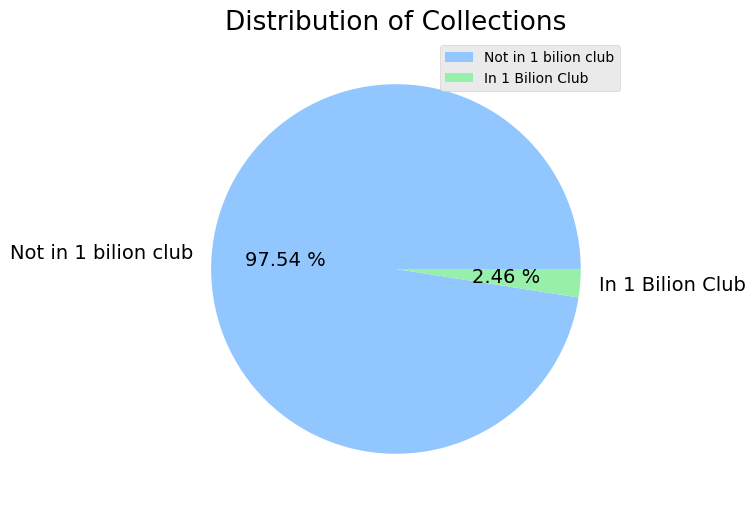

In [86]:
count_1b=df.groupby(['1 bilion club']).count()['Collections']
labels_1b= ["Not in 1 bilion club","In 1 Bilion Club"]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(count_1b,labels=labels_1b,autopct='%0.2f %%',textprops={'fontsize':14})
plt.title("Distribution of Collections" ,fontdict={'fontsize': 19})
plt.legend(fontsize=10)
plt.show()


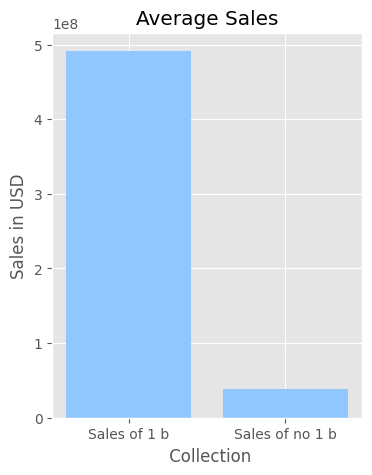

In [64]:
x=['Sales of 1 b','Sales of no 1 b']
avg_1b=[average_sales_1b,average_sales_no1b]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(4,5))
plt.bar(x,avg)
plt.title('Average Sales')
plt.xlabel(' Collection')
plt.ylabel('Sales in USD')
plt.show()

In [ ]:
# Visualization of how much percentage of total collections belongs to 100 mil club


In [57]:
df
df_1b

,Collections,Sales in USD,Buyers,Transactions,Owners,100 mil club,1 bilion club,1 miliclub,20 miliclub
0,Axie Infinity,4065032779,1724932,15829552,2560082,Yes,Yes,No,No
1,CryptoPunks,2219339345,5489,20892,3634,Yes,Yes,No,No
4,Art Blocks,1234293195,28912,153656,33996,Yes,Yes,No,No


In [97]:
#THE COLLECTION MAKING MOST SALES (ALL TIME)
maximum_sales=df['Sales in USD'].max()
collection=df[df['Sales in USD']==maximum_sales]['Collections'][0]
print(f' The NFT Collection having maximum sales is {collection}')
print(f'Total sales of {collection} are {maximum_sales:,} USD')

 The NFT Collection having maximum sales is Axie Infinity
Total sales of Axie Infinity are 4,065,032,779 USD


In [121]:
#DOES MORE NUMBER OF TRANSACTION PROVE MORE SALES? LET'S FIND OUT...
most_transaction=df['Transactions'].max()
most_data=df[df['Transactions']==most_transaction]
collection_of_most=most_data['Collections'].iloc[0] # lay cot dau tien
sales_of_most=most_data['Sales in USD'].iloc[0] # lay gia tri dau tien trong cot Sales in USD

Lower_transaction=df.iloc[1][3]
collection_of_lower=df.iloc[1][0]
sales_of_lower=df.iloc[1][1]
print(f'{collection_of_most} has {most_transaction} transaction (Highest amongst all)')
print(f'{collection_of_lower} has {Lower_transaction} transaction (Relitively lower transaction)')

NBA Top Shot has 19456210 transaction (Highest amongst all)
CryptoPunks has 20892 transaction (Relitively lower transaction)


In [ ]:
# VISUALIZE THIS USING GRAPH

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

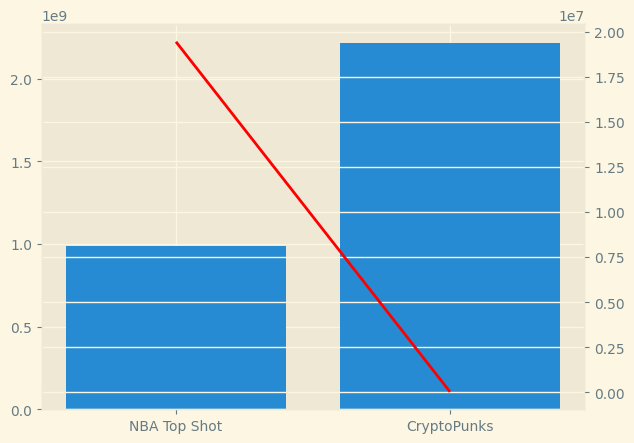

In [130]:
collections=[collection_of_most,collection_of_lower]
sales=[sales_of_most,sales_of_lower]
transaction=[most_transaction,Lower_transaction]
plt.style.use('Solarize_Light2')
fig,ax1=plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
p=ax1.bar(collections,sales)
ax2.plot(collections,transaction,'r-')
ax1.bar_label(p)
plt.title('Co - Relation between  Sales And Transaction')
ax1.set_xlabel('NFT collection')
ax1.set_ylabel('Sales in USD', color='g')
ax2.set_ylabel('Transactions',color='r')
plt.show()

NBA Top Shot has 19456210 transactions (Highest amongst all)
CryptoPunks has 20892 transactions (Relatively lower transaction)


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

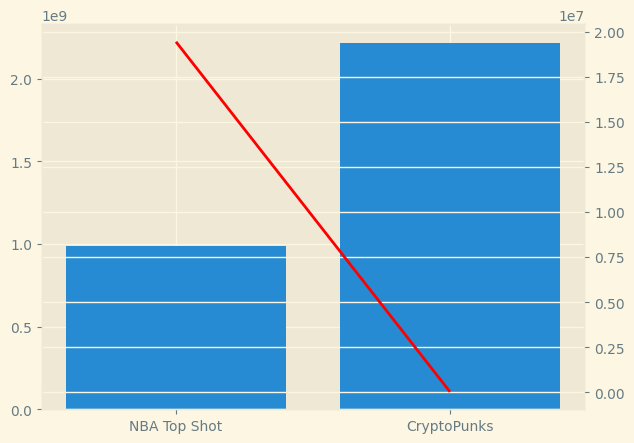

In [131]:
most_transaction  = df['Transactions'].max()
most_data = df[df['Transactions']==most_transaction]
collection_of_most = most_data['Collections'].iloc[0]
sales_of_most = most_data['Sales in USD'].iloc[0]

lower_transact = df.iloc[1][3]
collection_of_lower = df.iloc[1][0]
sales_of_lower = df.iloc[1][1]

print(f'{collection_of_most} has {most_transaction} transactions (Highest amongst all)')
print(f'{collection_of_lower} has {lower_transact} transactions (Relatively lower transaction)')

#LET'S VISUALIZE THIS USING GRAPHS
collections = [collection_of_most,collection_of_lower]
sales = [sales_of_most,sales_of_lower]
transactions = [most_transaction,lower_transact]

plt.style.use('Solarize_Light2')
fig,ax1 = plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
p = ax1.bar(collections,sales)
ax2.plot(collections,transactions,'r-')
ax1.bar_label(p)
plt.title('Co-relation between Sales and Transactions')
ax1.set_xlabel('NFT Collection')
ax1.set_ylabel('Sales in $',color='g')
ax2.set_ylabel('Transactions',color='r')
plt.show()

In [8]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df


,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [11]:
df.dropna(axis='columns')
# bo cac cot thieu it nhat 1 phan tu

,name
0,Alfred
1,Batman
2,Catwoman


In [13]:
df.dropna(how='all')
# bo cac hang thieu tat ca cac phan tu

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [15]:
# giu lai cac hang co it 2 nhat 2 gia tri khong phai bang Na
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [17]:
#Giữ DataFrame với các mục nhập hợp lệ trong cùng một biến
df.dropna(inplace=True)
df

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [19]:
#Define in which columns to look for missing values.

df.dropna(subset=['name','toy'])
df

,name,toy,born
1,Batman,Batmobile,1940-04-25
